<img src=../materials/banner.png width="70%">

# Exercises for beginner programmers
1. [Introduction](#Introduction)
1. [Exercise 1: Characterizing human speech](#Exercise1)
1. [Exercise 2: Creating and characterizing a musical rhythm](#Exercise2)
1. [Exercise 3: Sperm whale clicks](#Exercise3)
1. [Bonus: Play around with bat data](#PlayAround)

### Weird errors?
If you every get stuck and get weird errors, even though you're doing exactly as told, try restarting the kernel. You can do this by clicking on the `Kernel` menu, and selecting `Restart Kernel...`. This will clear all variables, and you can start over again. Note that you will probably have to run all relevant cells again, by clicking on each cell and pressing `Control + Enter`.

## Exercise 1: Characterizing human speech rhythm <a name="Exercise1"></a>

### Background <a name="Exercise1-background"></a>

Let us start with the most crazy animal of all: the human. We will use a dataset of human speech, and extract some rhythmic measures from it. The dataset is an abridged version of [this speech corpus](https://www.ortolang.fr/market/corpora/sldr000033?lang=en). It contains a number of phrases, their syllables, and the durations of the syllables.

![human speech rhythm](https://www.cell.com/cms/attachment/2c7a6e28-551a-40dd-a229-5ab061539285/gr1b2_lrg.jpg)
*From [Kotz, Ravignani, & Fitch, 2018](https://doi.org/10.1016/j.tics.2018.08.002)*

Speech consists of rhythms at different timescales. In English, for instance, there is an underlying rhythm indicating stressed words, but also one that indicates stressed syllables.

### Importing packages and loading the data <a name="Exercise1-dataloading"></a>

We always first load the packages that we need. For now, we only need the following: 

In [10]:
import thebeat
import pandas as pd

# In addition, we run the following code. This you don't have to remember (it's for the plots to display nicely in this notebook):
%matplotlib inline

<div class="alert alert-block alert-info">
Don't forget to run the code by pressing CTRL+Enter, or by pressing the little play icon.


Note how we use the `as` keyword to give the package a shorter name. This is not necessary, but it is a common convention.
</div>


---

We can then load the data using [Pandas](https://pandas.pydata.org/), a package for working with tables. We will load the data from a CSV file, which is a common file format for tables. The data is stored in a file called `syllables.csv`, which is located in the `data` folder. We can load the data using the `read_csv()` function from Pandas. We will store the data in a variable called `syllables`.

Because we're working online (and the server is a Linux machine), we use `/` to separate between folders and files. You would do the same on your own computer if you have a Mac. On a Windows you would use `\` instead.

Now run the following code to load the data using Pandas:

In [2]:
syllables = pd.read_csv('data/syllables.csv')

To take a quick look at the data, we can use the `head()` method. This will show the first 5 rows of the table:

In [3]:
syllables.head()

,phrase,word,syllable_stress,syllable_duration
0,1,Good,S,110
1,1,morning,S,189
2,1,morning,U,199
3,2,more,S,160
4,2,news,S,330


### First look at one phrase of English

Let's select one of the phrases, and plot it using [thebeat](https://thebeat.readthedocs.io), a package for working with rhythms and other temporal data. Don't worry to much if you don't understand the code, the goal here is to get a feel for the data.

We will use the syllables' durations as so-called 'inter-onset intervals' (IOIs). These are widely used in timing research, and in this case represent the time difference between the onset of one syllable, and the onset of the next syllable. Similar terms are 'inter-stimulus interval' (ISI) and stimulus-onset asynchrony (SOA), though they are used in slightly different contexts.

/Users/jellevanderwerff/st_etienne_winterschool/venv/lib/python3.9/site-packages/thebeat/helpers.py:466: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


(<Figure size 2400x600 with 1 Axes>,
 <Axes: title={'center': '"In announcing the award..."'}, xlabel='Time'>)

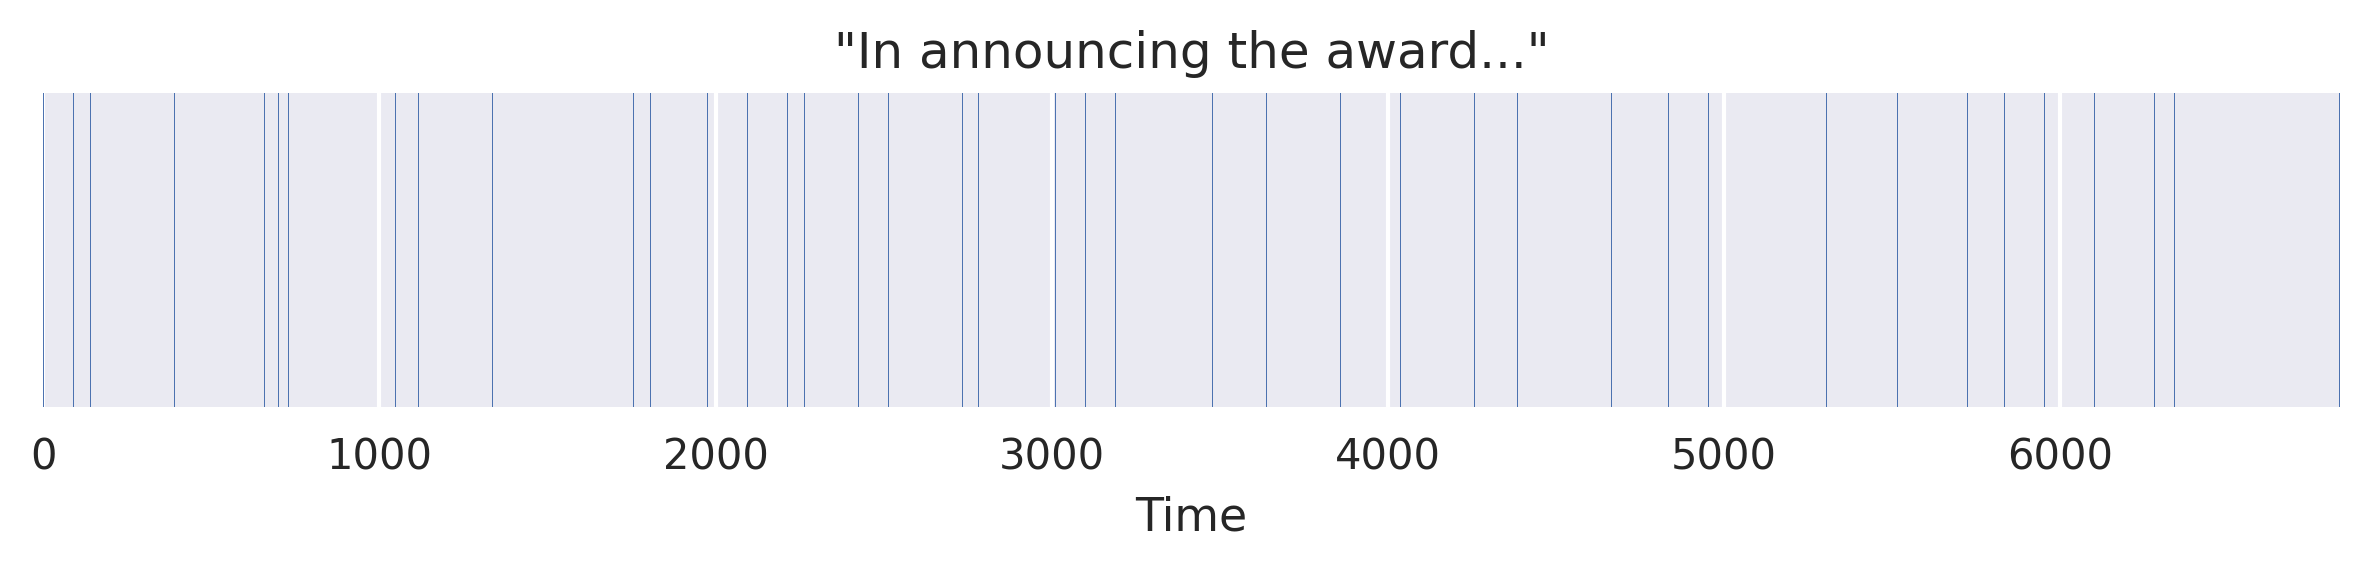

In [4]:
# Select the fourth phrase
phrase = syllables[syllables.phrase == 4]

# Make a 'Sequence' out of the phrase's syllable durations
sequence = thebeat.Sequence(iois=phrase.syllable_duration)

# Plot!
sequence.plot_sequence(title='"In announcing the award..."', dpi=300, figsize=(8, 2))

The plotted lines here indicate the syllable onsets, and the distance between the lines indicate the IOIs.

### Distributional properties

We can easily extract some distributional properties from the data. We will use Pandas' `describe()` method to do so. This will give us the mean, standard deviation, etc.

In [5]:
syllables.syllable_duration.describe()

count    219.000000
mean     166.283105
std       89.823947
min       19.000000
25%      100.000000
50%      150.000000
75%      219.500000
max      500.000000
Name: syllable_duration, dtype: float64

So, the average syllable duration us ~166 milliseconds, with a standard deviation of ~90 milliseconds.

---


Are the syllable durations normally distributed? 

For a single ``Sequence`` object, we can calculate Kolmogorov-Smirnov *D* using *thebeat* as follows:

In [6]:
thebeat.stats.ks_test(sequence, reference_distribution='normal')

KstestResult(statistic=0.11102780175892857, pvalue=0.6665437505824809, statistic_location=120.0, statistic_sign=1)

**Question:** What does the *p*-value tell us? And the *D* statistic?

### Calculating the nPVI

In the code block below, calculate the normalized Pairwise Variability Index (nPVI) that was mentioned in the presentation. 

In [7]:
# Finish this code:
npvi =

# Print the result
print(npvi)

SyntaxError: invalid syntax (2979286919.py, line 2)

**Question:** What does this value say about the rhythm class of English?

<div class="alert alert-block alert-success">
<b>Hint:</b> Use <code>thebeat.stats.get_npvi()</code> to calculate the nPVI. The function takes as input the <code>sequence</code> variable we created above.
</div>

## Exercise 2: Creating and characterizing a musical rhythm <a name="Exercise2"></a>

Moving away from speech, let us now see how we can create a rhythm using *thebeat*, plot it, and visualize some of its properties.

Again, we first import the necessary packages. For this exercise, we only need *thebeat*:

In [39]:
import thebeat

We create a new ``Rhythm`` object and plot it in musical notation. We will enter the notes as fractions. The value we supply to ``beat_ms`` indicates the value of a quarternote (if the time signature is e.g. 4/4).

/Users/jellevanderwerff/st_etienne_winterschool/venv/lib/python3.9/site-packages/thebeat/helpers.py:378: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


(<Figure size 3840x2880 with 1 Axes>, <Axes: >)

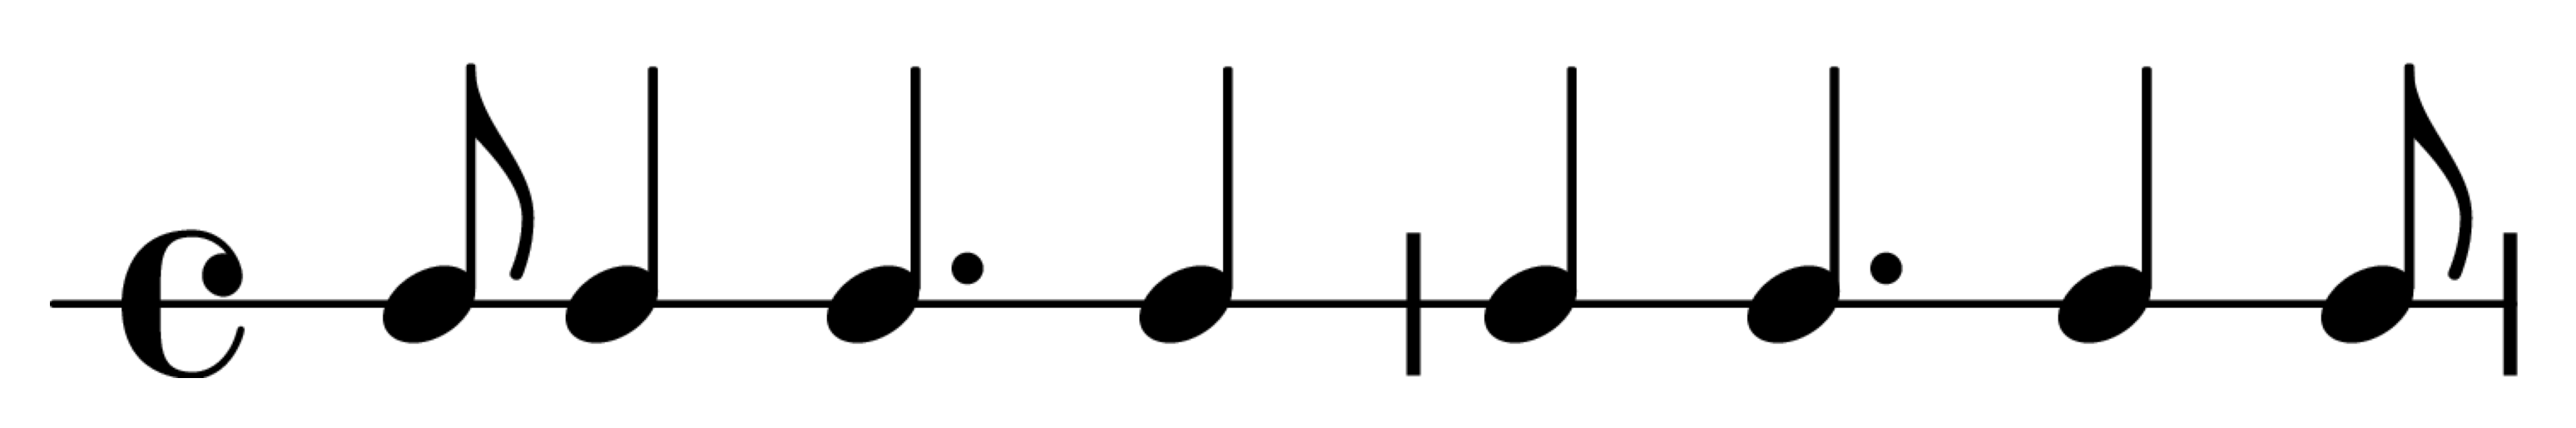

In [33]:
rhythm = thebeat.music.Rhythm.from_fractions([1/8, 1/4, 3/8, 1/4, 1/4, 3/8, 1/4, 1/8], time_signature=(4, 4), beat_ms=250)
rhythm.plot_rhythm()

### Make a phase space plot

Phase space plots give an intuitive understanding of the rhythmic structure of a sequence. We can plot one easily using *thebeat* with the ``thebeat.visualization.phase_space_plot()`` function. Before we can do this however, we have to convert the ``Rhythm`` object to a ``Sequence`` object. Finish the code below to make a phase space plot:

/Users/jellevanderwerff/st_etienne_winterschool/venv/lib/python3.9/site-packages/thebeat/visualization.py:504: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


(<Figure size 800x550 with 1 Axes>,
 <Axes: xlabel='$\\mathregular{IOI_t}$', ylabel='$\\mathregular{IOI_{t+1}}$'>)

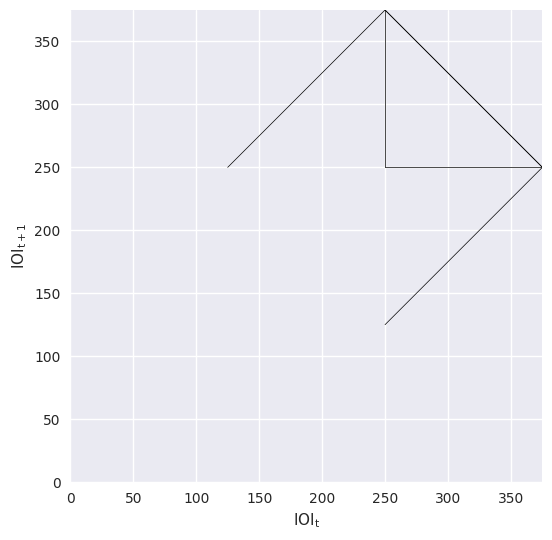

In [34]:
# Convert Rhythm to Sequence
rhythm_sequence = rhythm.to_sequence()

# Make phase space plot, enter your code below:


<div class="alert alert-block alert-success">
<b>Hint:</b> <code>thebeat.visualization.phase_space_plot</code> requires a sequence as input.
</div>

**Question:** What does the phase space plot reveal about the rhythm?

---


Another visualization technique is a so-called recurrence plot. What do you think the following recurrence plot reveals? The *x* and *y* axes denote the indices of the sound onsets. The colors indicate the distance between two IOIs.

/Users/jellevanderwerff/st_etienne_winterschool/venv/lib/python3.9/site-packages/thebeat/visualization.py:814: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


(<Figure size 500x400 with 2 Axes>,
 <Axes: xlabel='$\\mathregular{N_i}$', ylabel='$\\mathregular{N_i}$'>)

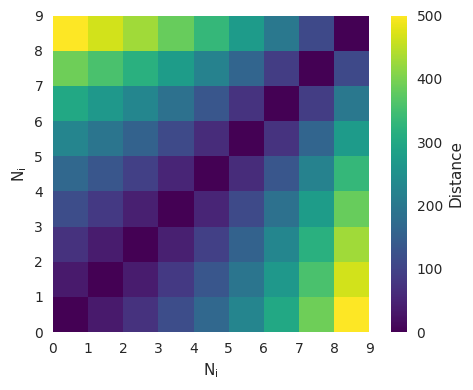

In [38]:
seq = thebeat.Sequence.generate_isochronous(10, 500)
seq.change_tempo_linearly(0.5)
thebeat.visualization.recurrence_plot(seq, colorbar=True)

## Exercise 3: Sperm whale clicks <a name="Exercise3"></a>

Now, let's look at some bioacoustics. We will use an abridged version of the dataset from [Hersh, Gero, Rendell, & Whitehead (2021)](https://doi.org/10.1111/2041-210X.13644).

As a bit of background, sperm whales produce so-called 'clicks' for echolocation and communication. These clicks are very loud, and can be heard over large distances (hundreds/thousands of miles). They are also very short, with durations of only a few milliseconds. Sperm whales live in 'clans' with specific dialects that are characterized by differences in click patterns.

One string of clicks we call a 'coda'.

For this exercise, we will use *thebeat*, *pandas*, and *matplotlib* (a package for plotting).

In [68]:
import thebeat
import pandas as pd
import matplotlib.pyplot as plt

**Load the data and save it in a variable called `clicks`. Use the `read_csv()` function from Pandas again, and then visualize the first 5 rows using the `head()` method. The dataset's file location is `data/whales.csv`.**

In [46]:
# Load the data
clicks =

# Show first 5 rows


We will now make a 'list' of *thebeat* ``Sequence`` objects for each of the codas (i.e. a sperm whale click sequence). Below is a quick way of doing that:

In [50]:
# Make empty list
sequences = []

# Loop over each coda, make a thebeat.Sequence, and add it to the list
for codanum, coda_dataframe in clicks.groupby("codanum"):
    sequence = thebeat.Sequence(iois=coda_dataframe.ioi, name=codanum)
    sequences.append(sequence)

Once we have that, we can quickly visualize these codas using *thebeat*'s ``plot_multiple_sequences`` function:

/Users/jellevanderwerff/st_etienne_winterschool/venv/lib/python3.9/site-packages/thebeat/visualization.py:680: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


(<Figure size 2400x1650 with 1 Axes>, <Axes: xlabel='Time'>)

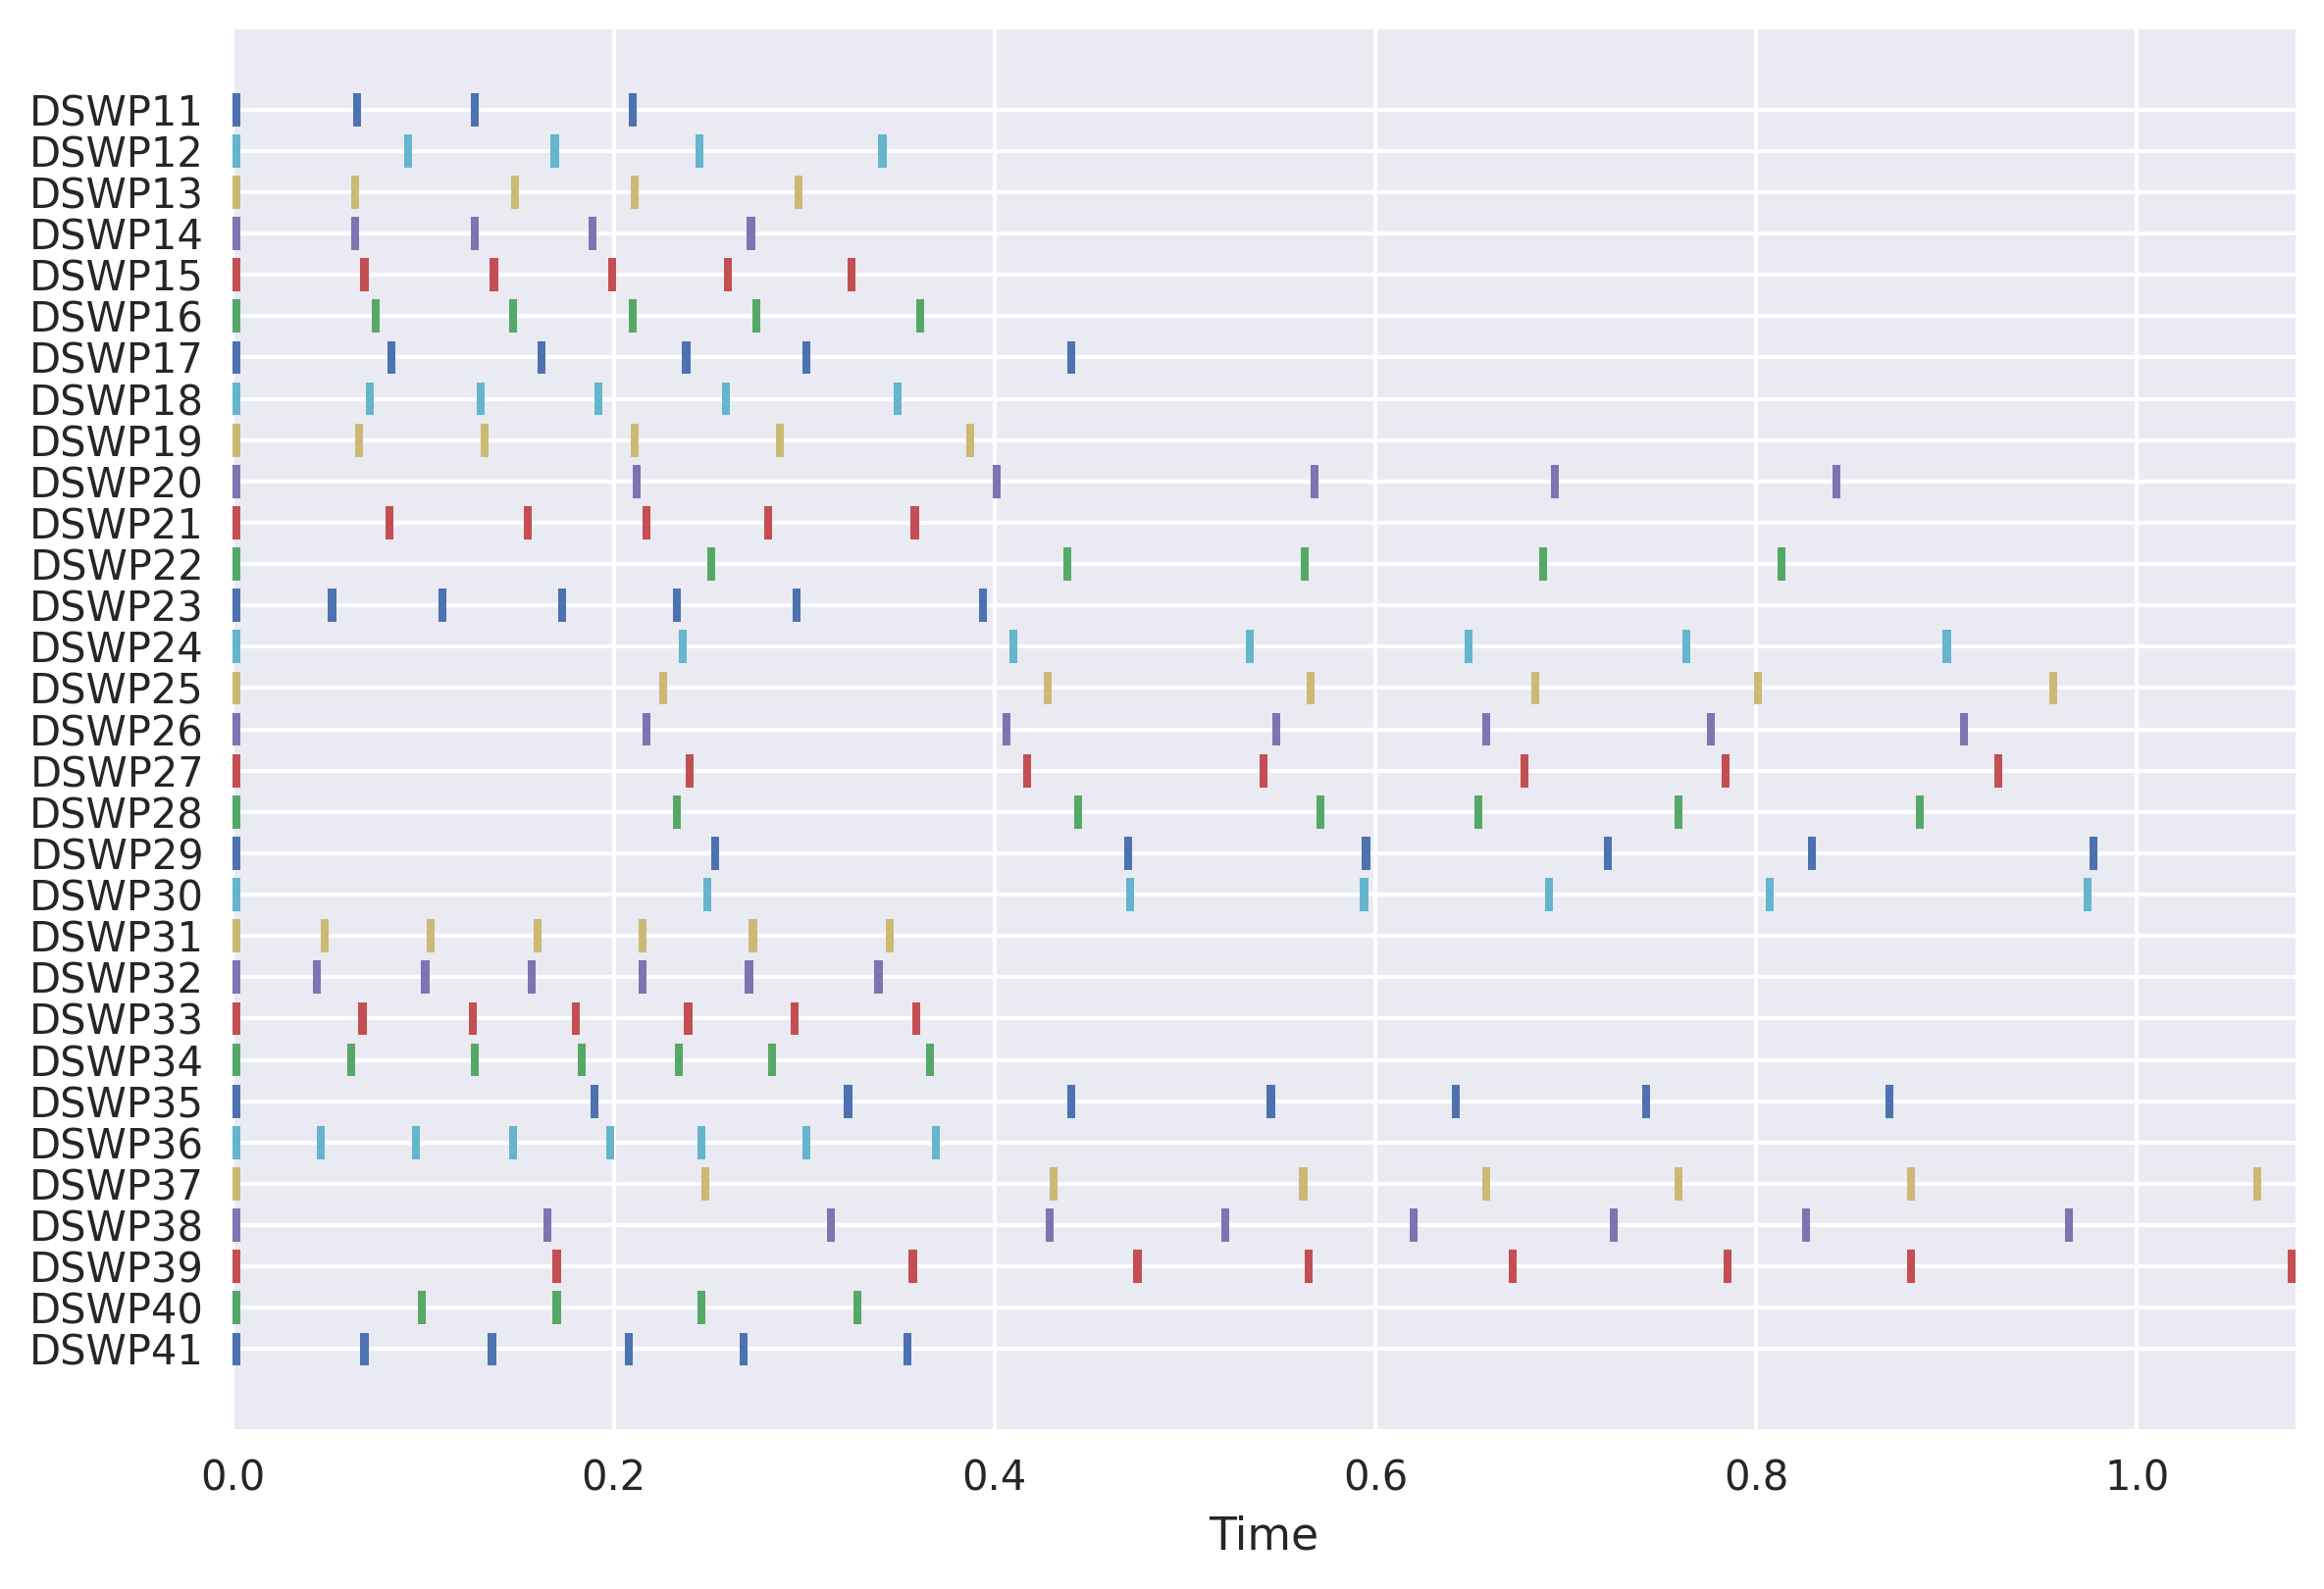

In [52]:
thebeat.visualization.plot_multiple_sequences(sequences, dpi=300)

*Note that the x axis is now in seconds (different from in the previous exercises)*

**Question:** Can you see any differences between the codas?

---


If we want to take a look at the distribution of the inter-click intervals, we can use Pandas' ``plot`` function. Let's also see what the median inter-click interval is:

Median inter-click interval: 0.09 s


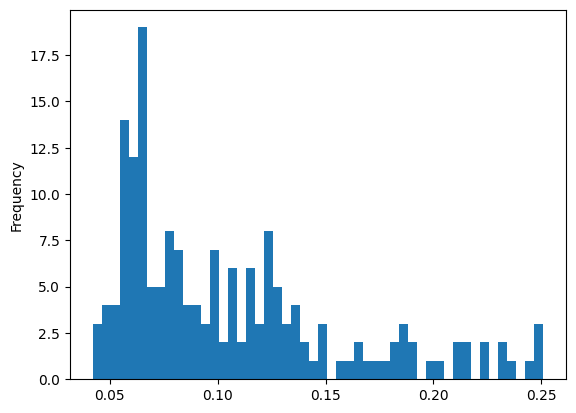

In [67]:
clicks.ioi.plot(kind='hist', bins=50)
print(f"Median inter-click interval: {clicks.ioi.median()} s")

To discover patterns, let's plot recurrence plots for the first twelve codas. The code below is maybe a little confusing, but it basically plots the recurrence plots for the first twelve codas in a 3x4 grid.

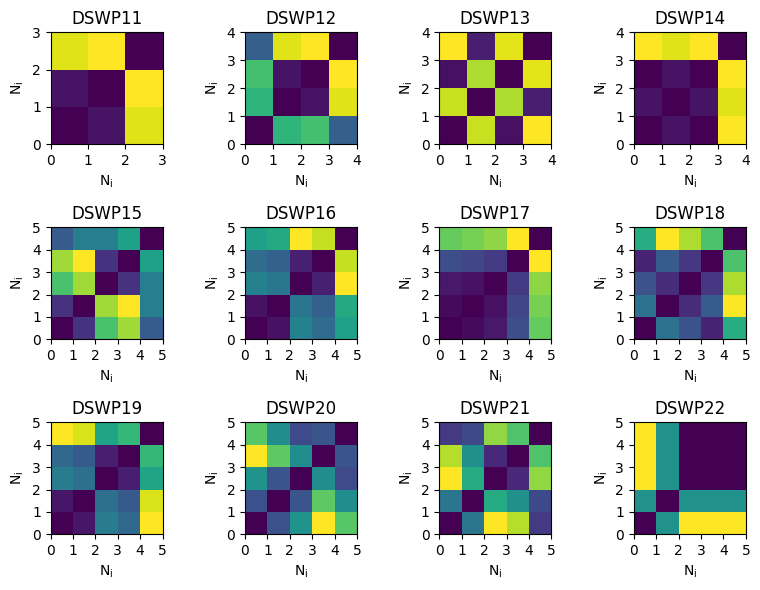

In [78]:
# Select first twelve codas
sample = sequences[:12]

# Make a grid
fig, axs = plt.subplots(3, 4, tight_layout=True, figsize=(8, 6))

# Loop over each sequence and plot it
for sequence, ax in zip(sample, axs.flatten()):
    thebeat.visualization.recurrence_plot(sequence, ax=ax)

**Question:** Which codas are similar and may have been produced by members of the same clan?

## Bonus: Play around with bat data <a name="PlayAround"></a>

There is one additional dataset in the `data` folder, called `bats.csv`. This is a dataset from [Burchardt & Knörnschild (2020)](https://doi.org/10.1371/journal.pcbi.1007755) of bat vocalizations (species *Carollia perspicillata*). You can load it in the same way as the other datasets, and play around with it. You can for instance try to plot the distribution of the IOIs, make recurrence plots, etc.

If you want to learn about other functions that are included in *thebeat*, take a look at the [package documentation](https://thebeat.readthedocs.io/en/latest/), for instance under `Examples`.

In [79]:
# Play around with data and code!